TASK3 CAR PRICE PREDICTION WITH MACHINE LEARNING

The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. Car price
prediction is one of the major research areas in machine learning. So if you want to learn
how to train a car price prediction model then this project is for you.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploded=files.upload()

Saving car data.csv to car data.csv


In [3]:
data=pd.read_csv("car data.csv")

In [4]:
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [5]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
#data preprocessing
data.shape

(301, 9)

In [7]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [10]:
import datetime

In [11]:
date_time=datetime.datetime.now()

In [12]:
data['Age']=date_time.year - data['Year']

In [13]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [14]:
data.drop('Year',axis=1,inplace=True)

In [15]:
#EDA
data['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [16]:
data['Car_Name'].value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

<Axes: xlabel='Car_Name', ylabel='count'>

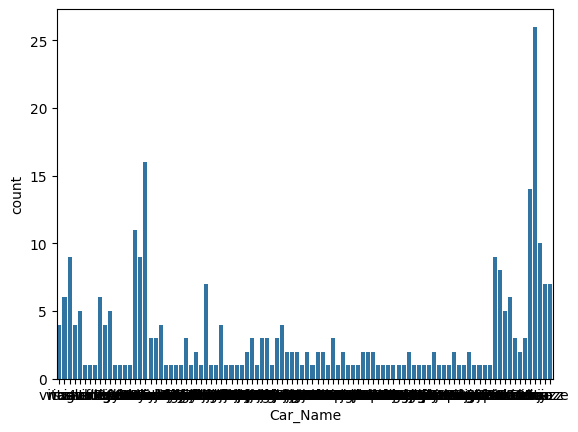

In [17]:
sns.countplot(x='Car_Name', data=data)


In [18]:
data['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

<Axes: xlabel='Fuel_Type', ylabel='count'>

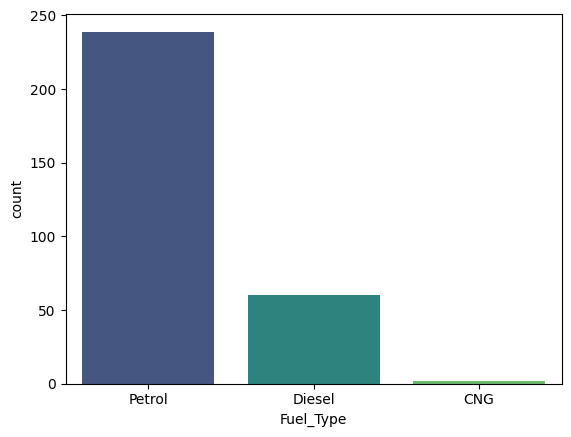

In [20]:
sns.countplot(x='Fuel_Type', data=data,hue='Fuel_Type', palette='viridis')

In [21]:
data['Selling_type'].value_counts()

Dealer        195
Individual    106
Name: Selling_type, dtype: int64

<Axes: xlabel='Selling_type', ylabel='count'>

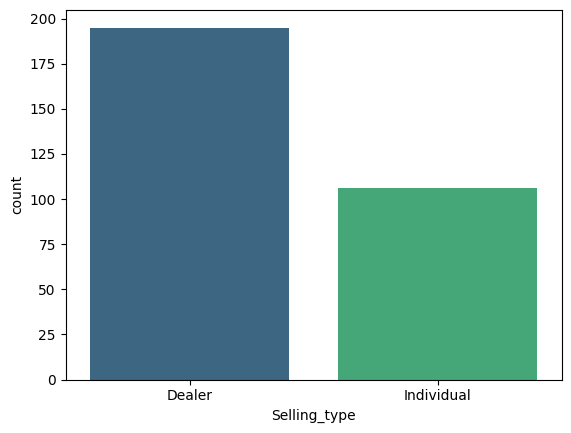

In [22]:
sns.countplot(x='Selling_type', data=data,hue='Selling_type', palette='viridis')

In [23]:
data['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

<Axes: xlabel='Transmission', ylabel='count'>

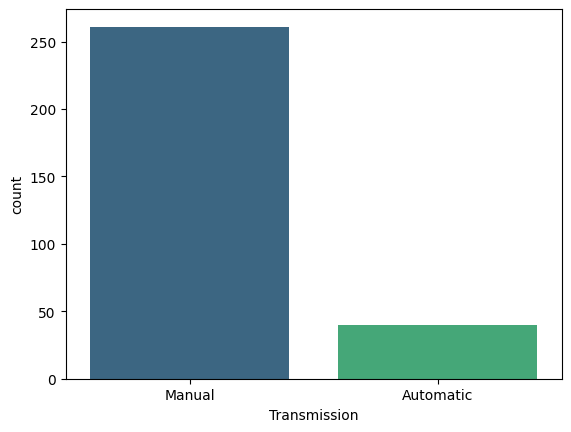

In [24]:
sns.countplot(x='Transmission', data=data,hue='Transmission',palette='viridis')

array([[<Axes: title={'center': 'Selling_Price'}>,
        <Axes: title={'center': 'Present_Price'}>],
       [<Axes: title={'center': 'Driven_kms'}>,
        <Axes: title={'center': 'Owner'}>],
       [<Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

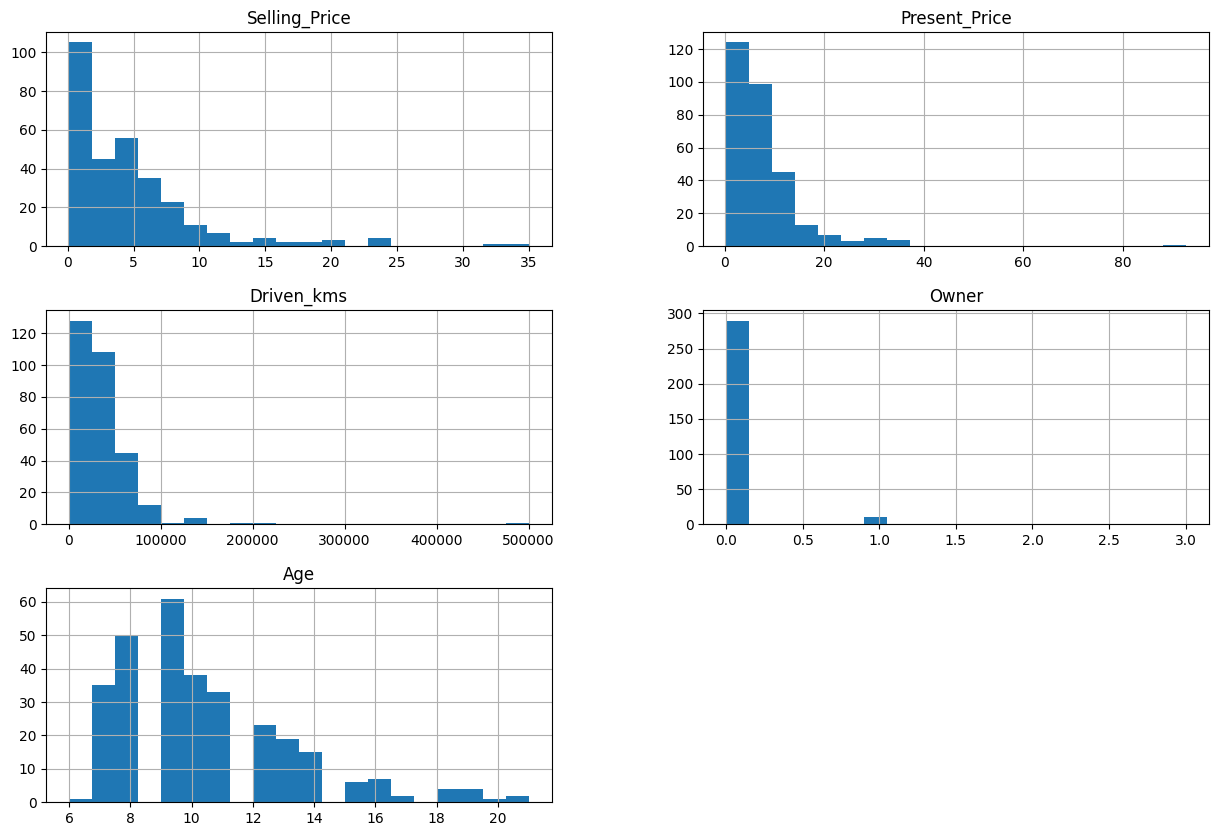

In [25]:
#Exploring Numerical features
data.hist(bins=20, figsize=(15, 10))

<Axes: xlabel='Selling_Price'>

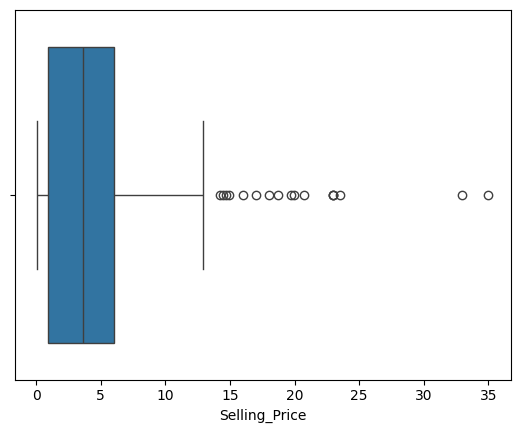

In [26]:
sns.boxplot(x=data['Selling_Price'])

In [27]:
sorted(data['Selling_Price'], reverse=True)

[35.0,
 33.0,
 23.5,
 23.0,
 23.0,
 23.0,
 20.75,
 19.99,
 19.75,
 18.75,
 18.0,
 17.0,
 16.0,
 14.9,
 14.73,
 14.5,
 14.25,
 12.9,
 12.5,
 11.75,
 11.5,
 11.45,
 11.25,
 11.25,
 11.25,
 10.9,
 10.25,
 10.11,
 9.7,
 9.65,
 9.5,
 9.25,
 9.25,
 9.25,
 9.15,
 9.1,
 8.99,
 8.75,
 8.65,
 8.55,
 8.5,
 8.4,
 8.4,
 8.35,
 8.25,
 8.25,
 7.9,
 7.75,
 7.75,
 7.75,
 7.5,
 7.5,
 7.5,
 7.45,
 7.45,
 7.45,
 7.4,
 7.25,
 7.25,
 7.2,
 7.05,
 6.95,
 6.85,
 6.75,
 6.7,
 6.6,
 6.5,
 6.5,
 6.45,
 6.4,
 6.25,
 6.25,
 6.15,
 6.1,
 6.0,
 6.0,
 6.0,
 6.0,
 5.95,
 5.95,
 5.9,
 5.85,
 5.85,
 5.8,
 5.75,
 5.75,
 5.65,
 5.5,
 5.5,
 5.5,
 5.5,
 5.5,
 5.4,
 5.4,
 5.35,
 5.3,
 5.3,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.2,
 5.15,
 5.11,
 5.0,
 4.95,
 4.95,
 4.9,
 4.9,
 4.85,
 4.8,
 4.8,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.65,
 4.6,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.4,
 4.4,
 4.4,
 4.35,
 4.15,
 4.1,
 4.1,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.95,
 3.95,
 3.9,
 3.9,
 3.8,
 3.75,
 3.75,
 3.6

In [28]:
# Removing Outliers
data=data[~(data['Selling_Price']>=33.0) & (data['Selling_Price']<=35.0) ]

In [29]:
data.shape

(299, 9)

In [30]:
#Encoding the categorical
data['Fuel_Type'].unique()


array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [31]:
data['Fuel_Type']=data['Fuel_Type'].map({'Petrol':0, 'Diesel':1, 'CNG':2})

<ipython-input-31-c83140893e6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Fuel_Type']=data['Fuel_Type'].map({'Petrol':0, 'Diesel':1, 'CNG':2})


In [32]:
data['Selling_type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [34]:
data['Selling_type'] = data['Selling_type'].map({'Dealer':0, 'Individual':1})

<ipython-input-34-0c972ec1c790>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Selling_type'] = data['Selling_type'].map({'Dealer':0, 'Individual':1})


In [33]:
data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [35]:
data['Transmission']= data['Transmission'].map({'Manual':0, 'Automatic':1})

<ipython-input-35-cbd40df51741>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Transmission']= data['Transmission'].map({'Manual':0, 'Automatic':1})


In [36]:
data.head()

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,0,0,0,0,10
1,sx4,4.75,9.54,43000,1,0,0,0,11
2,ciaz,7.25,9.85,6900,0,0,0,0,7
3,wagon r,2.85,4.15,5200,0,0,0,0,13
4,swift,4.60,6.87,42450,1,0,0,0,10


In [37]:
X=data.drop(['Car_Name','Selling_Price'],axis=1)
Y=data['Selling_Price']

In [38]:
from sklearn.model_selection import train_test_split
X_tarin,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [40]:
lin=LinearRegression()
lin.fit(X_tarin,Y_train)

ranfor=RandomForestRegressor()
ranfor.fit(X_tarin,Y_train)

gbr=GradientBoostingRegressor()
gbr.fit(X_tarin,Y_train)

xgbr=XGBRegressor()
xgbr.fit(X_tarin,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [43]:
y_predict1=lin.predict(X_test)
y_predict2=ranfor.predict(X_test)
y_predict3=gbr.predict(X_test)
y_predict4=xgbr.predict(X_test)

In [41]:
from sklearn import metrics

In [44]:
Score1=metrics.r2_score(Y_test,y_predict1)
Score2=metrics.r2_score(Y_test,y_predict2)
Score3=metrics.r2_score(Y_test,y_predict3)
Score4=metrics.r2_score(Y_test,y_predict4)

In [45]:
print(Score1,Score2,Score3,Score4)

0.6784776215585446 0.7296016312111885 0.8693782397080506 0.8743449962017417


In [46]:
final_data=pd.DataFrame({'Models':['lin','ranfor','gbr','xgbr'],"R2_SCORE":[Score1,Score2,Score3,Score4]})

In [47]:
final_data

,Models,R2_SCORE
0,lin,0.678478
1,ranfor,0.729602
2,gbr,0.869378
3,xgbr,0.874345


<ipython-input-48-acc3e293ab61>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=final_data["Models"], y=final_data["R2_SCORE"],palette='viridis')


<Axes: xlabel='Models', ylabel='R2_SCORE'>

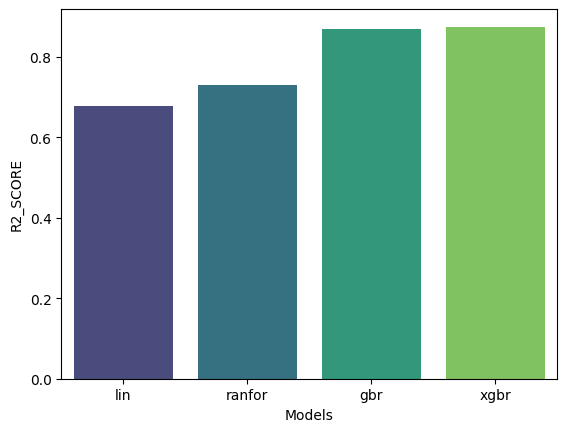

In [48]:
sns.barplot(x=final_data["Models"], y=final_data["R2_SCORE"],palette='viridis')